# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jeff\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("News_API_KEY")
api_key

'9bcc2e8b494c4308ba62babf6b037db5'

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [20]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)

btc_headlines

{'status': 'ok',
 'totalResults': 9435,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exxo

In [21]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)

eth_headlines

{'status': 'ok',
 'totalResults': 4582,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Alex H

In [22]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928
4,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807


In [25]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [26]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.020905,0.062800,0.066050,0.871150
std,0.373849,0.065173,0.057955,0.094478
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.037500,0.843500
50%,-0.114750,0.049000,0.063000,0.894000
75%,0.254725,0.085000,0.077000,0.930250
max,0.750600,0.202000,0.241000,0.964000


In [27]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.00000,20.000000
mean,-0.041355,0.05290,0.05690,0.890300
std,0.464782,0.07589,0.06113,0.068264
min,-0.765000,0.00000,0.00000,0.731000
25%,-0.334100,0.00000,0.00000,0.855250
50%,-0.249750,0.00000,0.06300,0.922500
75%,0.303775,0.07650,0.07550,0.937000
max,0.865500,0.26900,0.23300,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
#Questions:
#Q: Which coin had the highest mean positive score?

#A: BTC has highest mean positive score

#Q: Which coin had the highest compound score?

#A: ETH has hihgest compound score

#Q. Which coin had the highest positive score?

#A: ETH has hihgest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
btc_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [37]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
sw

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    
    return tokens

In [46]:
# Create a new tokens column for Bitcoin
tokenizer(btc_headlines["articles"][0]['content'])

['even',
 'though',
 'number',
 'womenfocused',
 'crypto',
 'space',
 'odeniran',
 'say',
 'woman',
 'still',
 'underrepresented',
 'ive',
 'space',
 'im',
 'black',
 'person',
 'woman',
 'b',
 'char']

In [47]:
# Create a new tokens column for Ethereum
tokenizer(eth_headlines["articles"][0]['content'])

['meta',
 'ha',
 'revealed',
 'nfts',
 'work',
 'instagram',
 'usbased',
 'test',
 'show',
 'youve',
 'bought',
 'created',
 'free',
 'connecting',
 'instagram',
 'account',
 'compatible',
 'digital',
 'walle',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [48]:
from collections import Counter
from nltk import ngrams

In [52]:
# Generate the Bitcoin N-grams where N=2
processed_btc = tokenizer(btc_headlines["articles"][0]['content'])
btc_counts = Counter(ngrams(processed_btc, n=2))
btc_counts

Counter({('even', 'though'): 1,
         ('though', 'number'): 1,
         ('number', 'womenfocused'): 1,
         ('womenfocused', 'crypto'): 1,
         ('crypto', 'space'): 1,
         ('space', 'odeniran'): 1,
         ('odeniran', 'say'): 1,
         ('say', 'woman'): 1,
         ('woman', 'still'): 1,
         ('still', 'underrepresented'): 1,
         ('underrepresented', 'ive'): 1,
         ('ive', 'space'): 1,
         ('space', 'im'): 1,
         ('im', 'black'): 1,
         ('black', 'person'): 1,
         ('person', 'woman'): 1,
         ('woman', 'b'): 1,
         ('b', 'char'): 1})

In [53]:
# Generate the Ethereum N-grams where N=2
processed_eth = tokenizer(eth_headlines["articles"][0]['content'])
eth_counts = Counter(ngrams(processed_eth, n=2))
eth_counts

Counter({('meta', 'ha'): 1,
         ('ha', 'revealed'): 1,
         ('revealed', 'nfts'): 1,
         ('nfts', 'work'): 1,
         ('work', 'instagram'): 1,
         ('instagram', 'usbased'): 1,
         ('usbased', 'test'): 1,
         ('test', 'show'): 1,
         ('show', 'youve'): 1,
         ('youve', 'bought'): 1,
         ('bought', 'created'): 1,
         ('created', 'free'): 1,
         ('free', 'connecting'): 1,
         ('connecting', 'instagram'): 1,
         ('instagram', 'account'): 1,
         ('account', 'compatible'): 1,
         ('compatible', 'digital'): 1,
         ('digital', 'walle'): 1,
         ('walle', 'char'): 1})

In [54]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(10)

In [55]:
# Use token_count to get the top 10 words for Bitcoin
token_count(processed_btc, N=3)

[('space', 2),
 ('woman', 2),
 ('even', 1),
 ('though', 1),
 ('number', 1),
 ('womenfocused', 1),
 ('crypto', 1),
 ('odeniran', 1),
 ('say', 1),
 ('still', 1)]

In [57]:
# Use token_count to get the top 10 words for Ethereum
token_count(processed_eth, N=3)

[('instagram', 2),
 ('meta', 1),
 ('ha', 1),
 ('revealed', 1),
 ('nfts', 1),
 ('work', 1),
 ('usbased', 1),
 ('test', 1),
 ('show', 1),
 ('youve', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin word cloud')

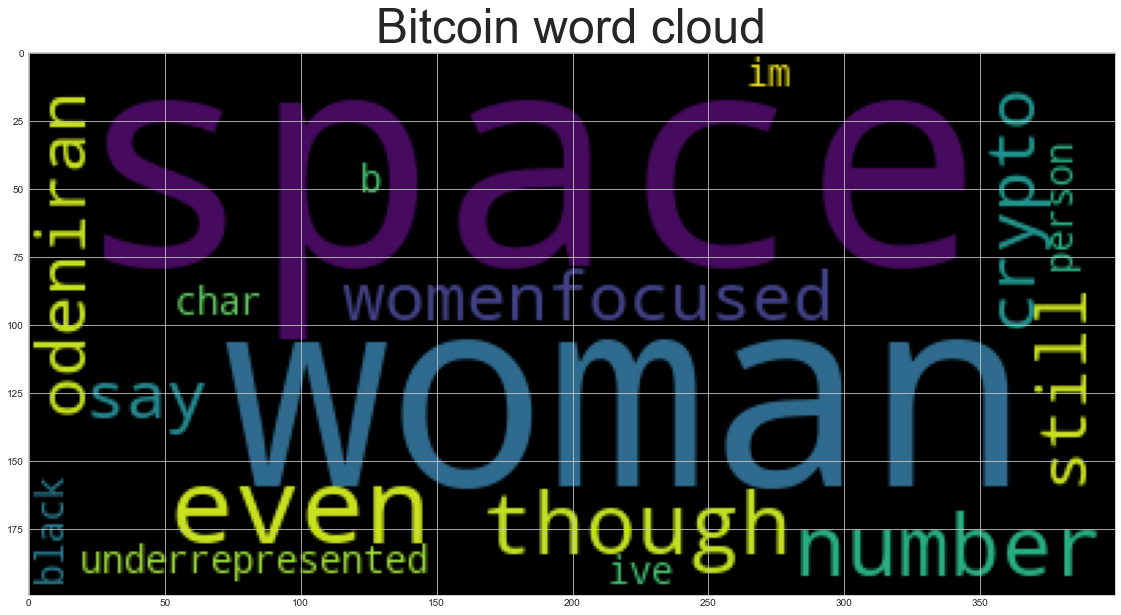

In [85]:
# Generate the Bitcoin word cloud
big_string = ' '.join(processed_btc)
wc_btc = WordCloud().generate(big_string)
plt.imshow(wc_btc)
plt.title("Bitcoin word cloud", fontsize=48)

Text(0.5, 1.0, 'Ethereum word cloud')

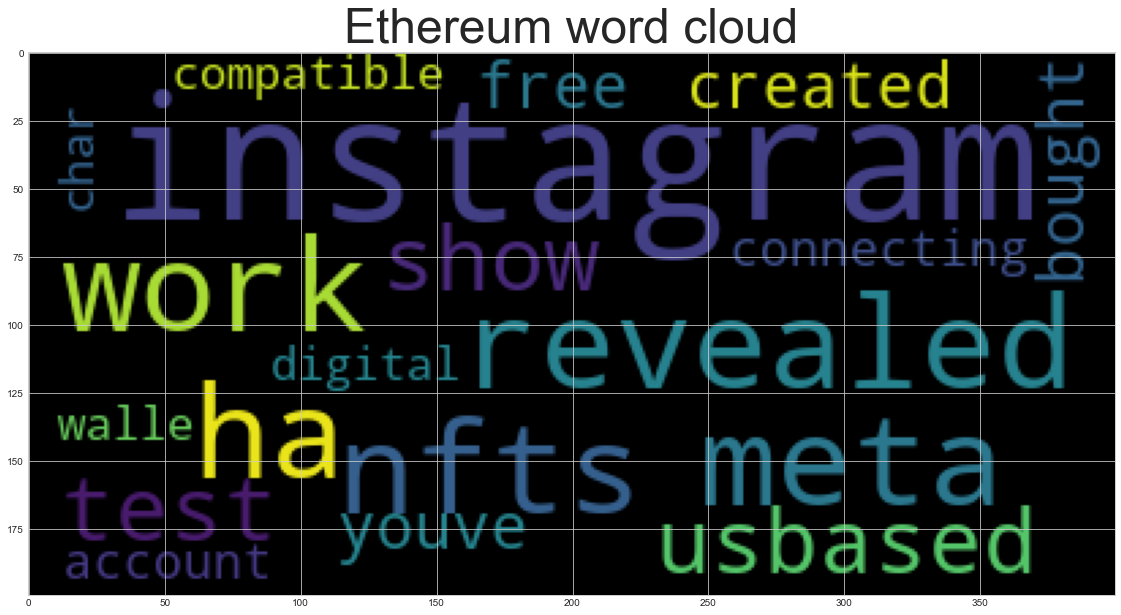

In [86]:
# Generate the Ethereum word cloud
big_string = ' '.join(processed_eth)
wc_eth = WordCloud().generate(big_string)
plt.imshow(wc_eth)
plt.title("Ethereum word cloud", fontsize=48)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [78]:
# Concatenate all of the Bitcoin text together
total_btc =[]
for x in btc_headlines["articles"]:
    total_btc.append(x['content'])
right_btc = ''.join(total_btc)

In [87]:
# Run the NER processor on all of the text
doc_btc = nlp(right_btc)

# Add a title to the document
doc_btc.user_data["title"] = "Bitcoin NER"

In [88]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [93]:
# List all Entities
print([ent.text for ent in doc_btc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'Last week', 'Fidelity Investments', 'the US Treasury', 'last July', '33,000', 'the week', 'last week', 'Fed', '26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '+339 chars]May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', '+361 chars]May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779 chars]May', '10', 'Reuters', 'chars]The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'Touadera', 'Bankman-Fried', 'the digital asset exchange', 'FTX', 'first', 'Septemb

---

### Ethereum NER

In [94]:
# Concatenate all of the Ethereum text together
total_eth =[]
for x in eth_headlines["articles"]:
    total_eth.append(x['content'])
right_eth = ''.join(total_btc)

In [99]:
# Run the NER processor on all of the text
doc_eth = nlp(right_eth)

# Add a title to the document
doc_eth.user_data["title"] = "Ethereum NER"

In [100]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [101]:
# List all Entities
print([ent.text for ent in doc_eth.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Buffett', 'the weekend', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'Last week', 'Fidelity Investments', 'the US Treasury', 'last July', '33,000', 'the week', 'last week', 'Fed', '26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '+339 chars]May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', '+361 chars]May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779 chars]May', '10', 'Reuters', 'chars]The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'Touadera', 'Bankman-Fried', 'the digital asset exchange', 'FTX', 'first', 'Septemb

---